In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
lin=linear_model.LinearRegression()
from sklearn import metrics
from sklearn.linear_model import Lasso
lasso=Lasso()
from sklearn.linear_model import Ridge
rd=Ridge()
from xgboost import XGBRegressor
xgbr=XGBRegressor()
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [2]:
data = pd.read_csv(r"C:\Users\jawah\Desktop\none\diamonds.csv")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
data.shape

(50000, 10)

In [4]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [5]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [6]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
data.price.value_counts()

price
802      121
776      119
605      119
828      118
625      115
        ... 
14490      1
14488      1
14486      1
14483      1
9775       1
Name: count, Length: 11297, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.cut =le.fit_transform(data.cut)
data.color =le.fit_transform(data.color)
data.clarity =le.fit_transform(data.clarity)

In [9]:
data.dtypes

carat      float64
cut          int32
color        int32
clarity      int32
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [10]:
price=data["price"]

In [11]:
data=data.drop(["price"],axis=1)

In [12]:
data["price"]=price

In [13]:
data.head(1)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43,326


In [14]:
data.price=le.fit_transform(data.price)

# Visualization

In [15]:
data.head(2)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43,0
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31,0


<Axes: xlabel='price', ylabel='Count'>

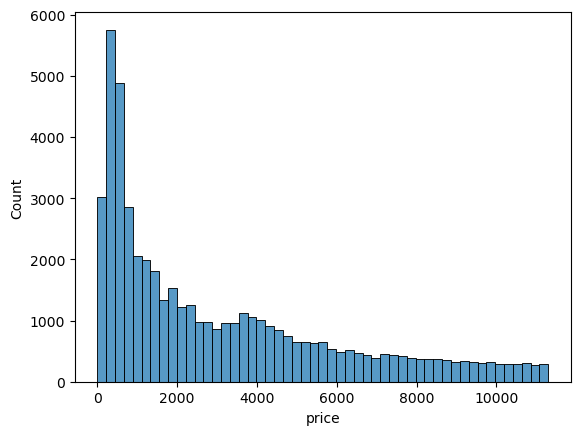

In [16]:
sns.histplot(data=data,x="price")

<Axes: xlabel='carat', ylabel='Count'>

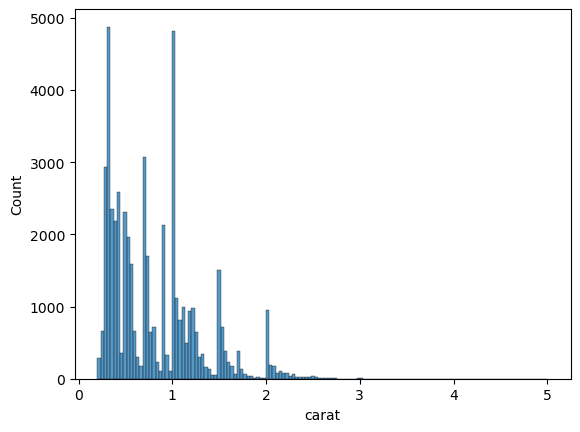

In [17]:
sns.histplot(data=data,x="carat")

<Axes: xlabel='cut', ylabel='Count'>

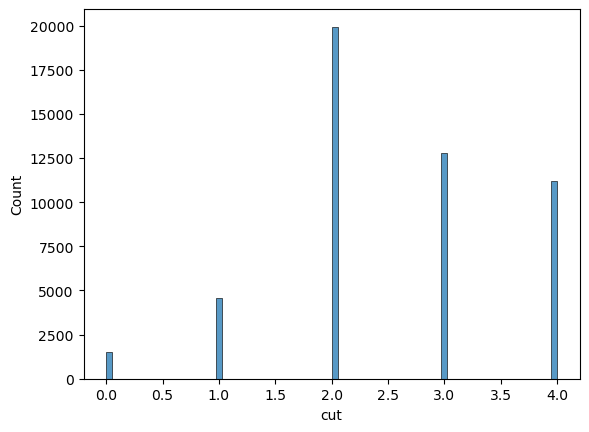

In [18]:
sns.histplot(data=data,x="cut")

<Axes: xlabel='x', ylabel='Count'>

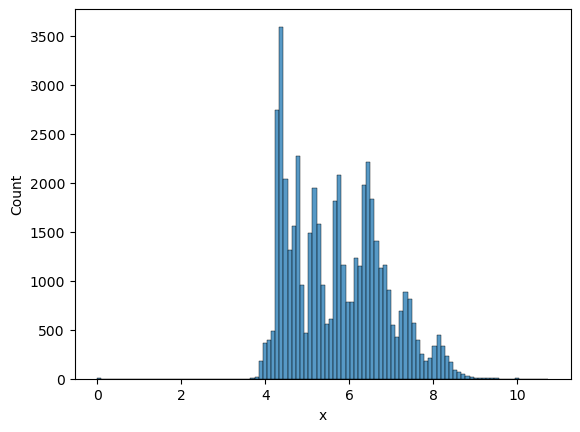

In [19]:
sns.histplot(data=data,x="x")

<Axes: xlabel='y', ylabel='Count'>

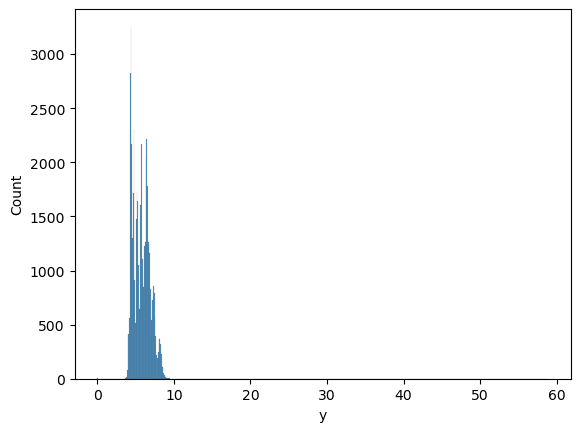

In [20]:
sns.histplot(data=data,x="y")

<Axes: xlabel='z', ylabel='Count'>

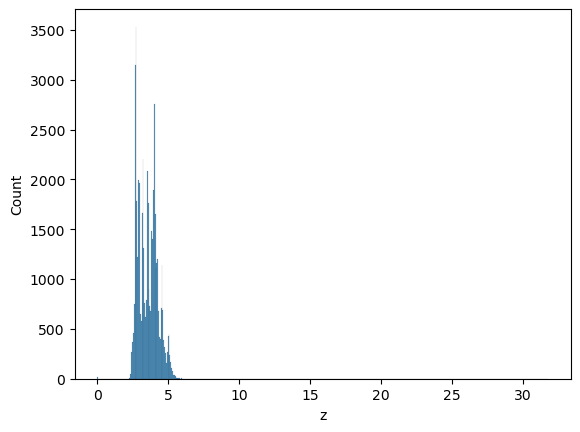

In [21]:
sns.histplot(data=data,x="z")

<Axes: xlabel='price', ylabel='Density'>

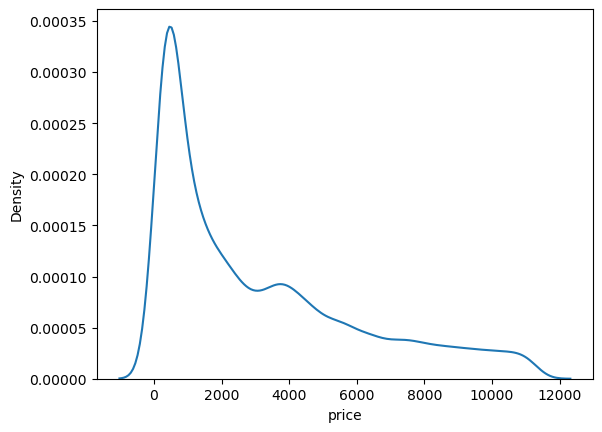

In [22]:
sns.kdeplot(data=data,x="price")

<Axes: xlabel='carat', ylabel='Density'>

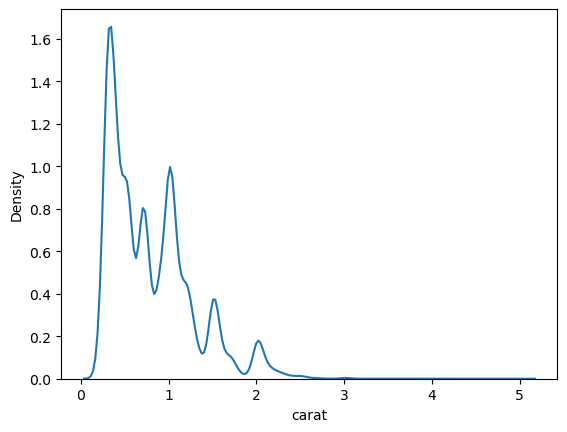

In [23]:
sns.kdeplot(data=data,x="carat")

<Axes: xlabel='carat'>

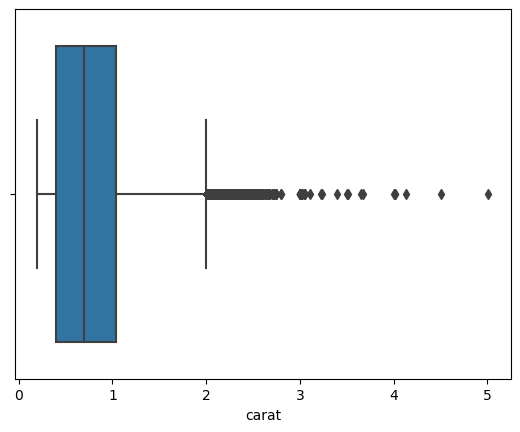

In [24]:
sns.boxplot(x="carat",data=data)

# Model Building

In [25]:
# Linear Regression

In [26]:
data.head(2)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43,0
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31,0


In [27]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [28]:
import sklearn
from sklearn.model_selection import train_test_split
dx_train,dx_test,dy_train,dy_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [29]:
dx_train.shape,dx_test.shape,dy_train.shape,dy_test.shape

((40000, 9), (10000, 9), (40000,), (10000,))

In [30]:
from sklearn import linear_model
ln=linear_model.LinearRegression()

In [31]:
ln.fit(dx_train,dy_train)

LinearRegression()

In [32]:
p1=ln.predict(dx_test)
p1

array([6077.5264113 , 4664.4159221 , 2805.47573526, ..., 2047.90097328,
       7334.46834148, 1491.10891502])

In [33]:
ln.intercept_

2898.1425026573506

In [34]:
ln.coef_

array([5217.13318201,   60.10614494, -186.31458287,  214.37657872,
        -63.13914045,  -55.11123283,  255.04466105,   31.35419396,
        261.60243302])

In [35]:
R2=ln.score(dx_train,dy_train)
R2

0.910671500376882

In [36]:
adj_R2=1-(((1-R2)*(40000-1))/(40000-9-1))
adj_R2

0.9106513964384823

In [37]:
from sklearn import metrics

In [38]:
MSE=metrics.mean_squared_error(dy_test,p1)
MSE

762017.8167620719

In [39]:
rMSE=pow(MSE,0.5)
rMSE

872.9363188469546

In [40]:
df1=pd.DataFrame({"Actual":dy_test,"Predicted":p1})
df1

,Actual,Predicted
18447,7071,6077.526411
17768,6731,4664.415922
45879,1675,2805.475735
16972,6390,4628.266254
12165,4778,5264.547598
...,...,...
40899,1116,1627.849105
7806,3833,4379.427964
41481,1178,2047.900973
21802,8742,7334.468341


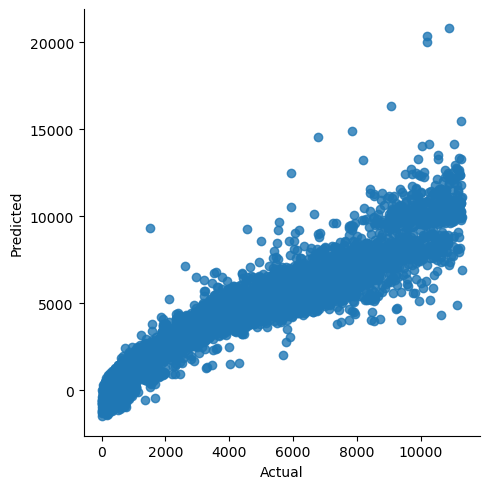

In [41]:
sns.lmplot(data=df1,x="Actual",y="Predicted")

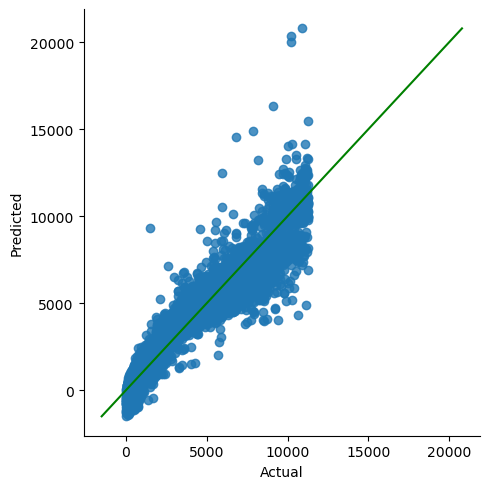

In [42]:
sns.lmplot(x="Actual",y="Predicted",data=df1,fit_reg=False)
d_line=np.arange(df1.min().min(),df1.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")

# Lasso

In [43]:
lasso.fit(dx_train,dy_train)

Lasso()

In [44]:
p2=lasso.predict(dx_test)
p2

array([6079.16294728, 4666.01990735, 2808.14754972, ..., 2048.53526264,
       7320.84076775, 1500.52765253])

In [45]:
df2=pd.DataFrame({"Importances":list(lasso.coef_),"Columns":list(x)})
df2

,Importances,Columns
0,5147.704053,carat
1,59.548667,cut
2,-185.319803,color
3,214.204636,clarity
4,-55.393639,depth
5,-54.647507,table
6,335.597308,x
7,40.393334,y
8,160.232166,z


In [46]:
lr2=lasso.score(dx_train,dy_train)
lr2

0.9106584371537177

In [47]:
adjlr2=1-(((1-lr2)*(40000-1))/(40000-9-1))
adjlr2

0.9106383302753578

In [48]:
result=pd.DataFrame({"actual":dy_test,"predicted":p2})
result

,actual,predicted
18447,7071,6079.162947
17768,6731,4666.019907
45879,1675,2808.147550
16972,6390,4635.616038
12165,4778,5268.847535
...,...,...
40899,1116,1629.528762
7806,3833,4381.022896
41481,1178,2048.535263
21802,8742,7320.840768


In [49]:
mse1=metrics.mean_squared_error(dy_test,p2)
mse1

758132.9235531405

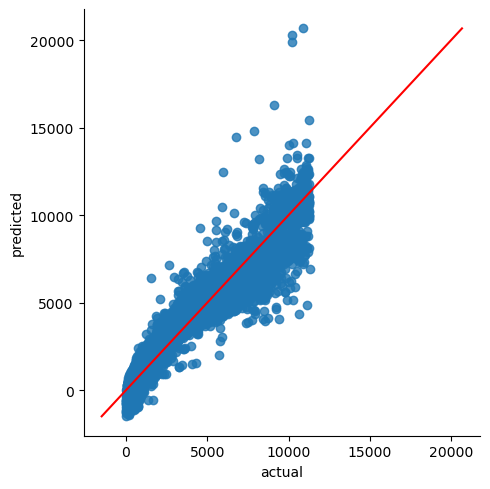

In [50]:
sns.lmplot(x="actual",y="predicted",data=result,fit_reg=False)
d_line=np.arange(result.min().min(),result.max().max())
plt.plot(d_line,d_line,color="red",linestyle="-")

# Ridge

In [51]:
rd.fit(dx_train,dy_train)

Ridge()

In [52]:
p3=rd.predict(dx_test)
p3

array([6078.12581533, 4665.13897424, 2806.3913481 , ..., 2048.30558139,
       7333.25396237, 1492.09450139])

In [53]:
list(rd.coef_)

[5204.902280792491,
 60.13424901690465,
 -186.22189097181268,
 214.40326337283182,
 -62.89926580649587,
 -55.08868926639711,
 259.9688005796589,
 31.585866215745078,
 261.3532171711267]

In [54]:
d1=pd.DataFrame({"Coeff":list(rd.coef_),"columns":list(x)})
d1

,Coeff,columns
0,5204.902281,carat
1,60.134249,cut
2,-186.221891,color
3,214.403263,clarity
4,-62.899266,depth
5,-55.088689,table
6,259.968801,x
7,31.585866,y
8,261.353217,z


In [55]:
rdr2=rd.score(dx_train,dy_train)
rdr2

0.9106713209418571

In [56]:
adjrdr2=1-(((1-rdr2)*(40000-1))/(40000-9-1))
adjrdr2

0.9106512169630743

In [57]:
mse2=metrics.mean_squared_error(dy_test,p3)
mse2

761951.8297394854

# XGB Regressor

In [58]:
xgbr.fit(dx_train,dy_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [59]:
p4=xgbr.predict(dx_test)

In [60]:
xgb_r2=xgbr.score(dx_train,dy_train)
xgb_r2

0.9928644632659457

In [61]:
xgb_adjrdr2=1-(((1-xgb_r2)*(40000-1))/(40000-9-1))
xgb_adjrdr2

0.9928628573687062

In [62]:
xgb_MSE=metrics.mean_squared_error(dy_test,p4)
xgb_MSE

102580.90503767149

# Random Forest Regressor

In [63]:
rf.fit(dx_train,dy_train)

RandomForestRegressor()

In [64]:
p5=rf.predict(dx_test)

In [65]:
rf_r2=rf.score(dx_train,dy_train)
rf_r2

0.998379762771912

In [66]:
rf_adjr2=1-(((1-rf_r2)*(40000-1))/(40000-9-1))
rf_adjr2

0.9983793981273745

In [67]:
dt_MSE=metrics.mean_squared_error(dy_test,p5)
dt_MSE

105604.38772787743

In [68]:
dff=pd.DataFrame({"Actual":dy_test,"Predicted":p5})
dff

,Actual,Predicted
18447,7071,7260.45
17768,6731,6402.94
45879,1675,1859.18
16972,6390,6545.05
12165,4778,5221.66
...,...,...
40899,1116,1138.24
7806,3833,4150.92
41481,1178,1175.29
21802,8742,8852.17


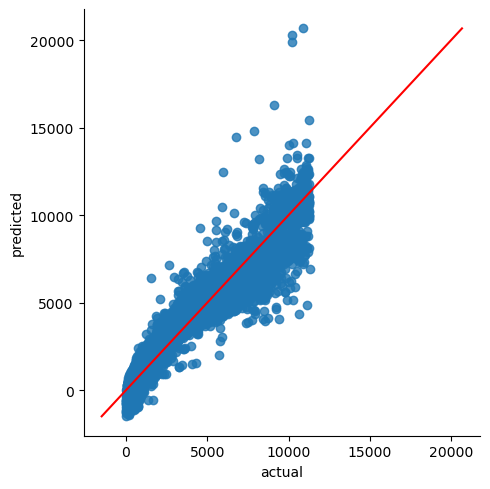

In [69]:
sns.lmplot(x="actual",y="predicted",data=result,fit_reg=False)
d_line=np.arange(result.min().min(),result.max().max())
plt.plot(d_line,d_line,color="red",linestyle="-")

In [70]:
l1=["Linear","Lasso","Ridge","XGB","Random_Forest"]
l2=[R2,lr2,rdr2,xgb_r2,rf_r2]
l3=[adj_R2,adjlr2,adjrdr2,xgb_adjrdr2,rf_adjr2]
l4=[MSE,mse1,mse2,xgb_MSE,dt_MSE]

In [71]:
final=pd.DataFrame({"Modelname":l1,"R-square":l2,"Adj-R2":l3,"MSE":l4})
final

,Modelname,R-square,Adj-R2,MSE
0,Linear,0.910672,0.910651,762017.816762
1,Lasso,0.910658,0.910638,758132.923553
2,Ridge,0.910671,0.910651,761951.829739
3,XGB,0.992864,0.992863,102580.905038
4,Random_Forest,0.998380,0.998379,105604.387728


# Outlier Treatment

In [72]:
data.head(2)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43,0
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31,0


<Axes: >

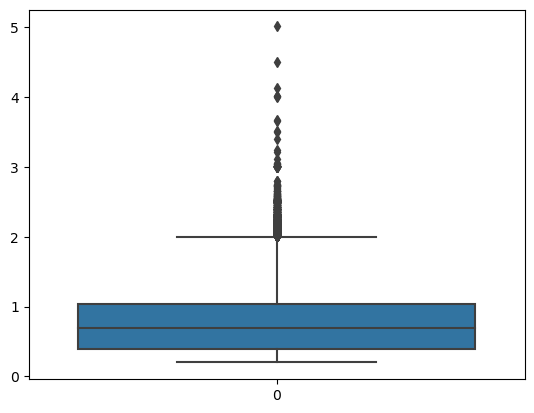

In [73]:
sns.boxplot(data["carat"])

<Axes: >

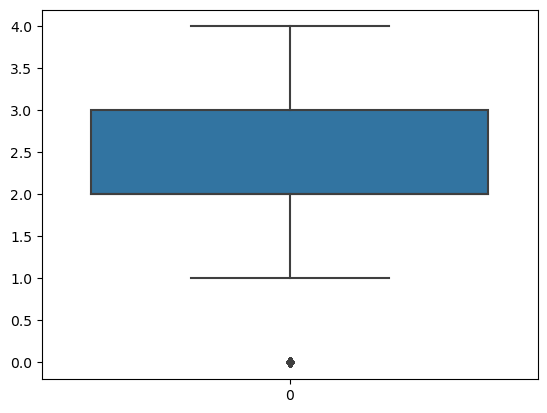

In [74]:
sns.boxplot(data["cut"])

<Axes: xlabel='carat', ylabel='Density'>

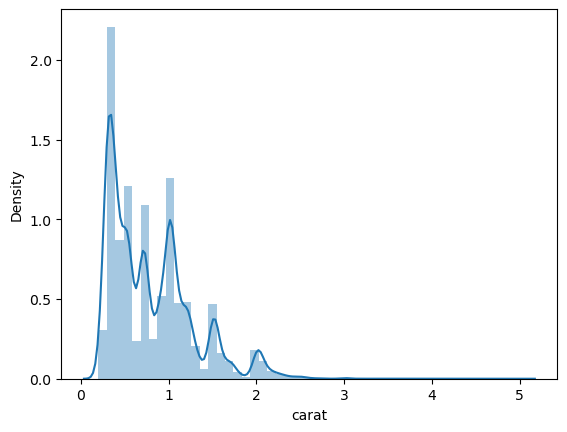

In [75]:
sns.distplot(data["carat"])

<Axes: >

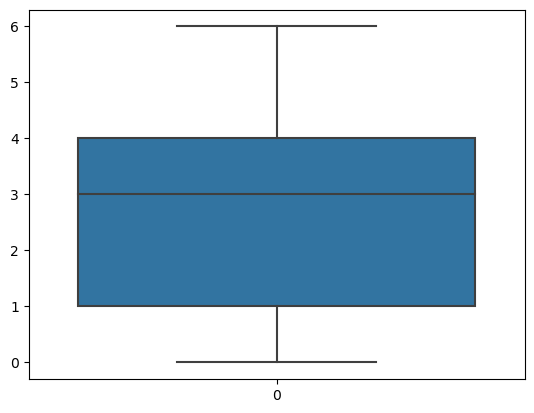

In [76]:
sns.boxplot(data["color"])

<Axes: >

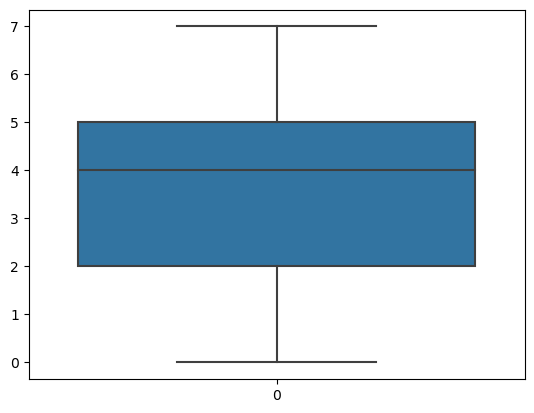

In [77]:
sns.boxplot(data["clarity"])

<Axes: >

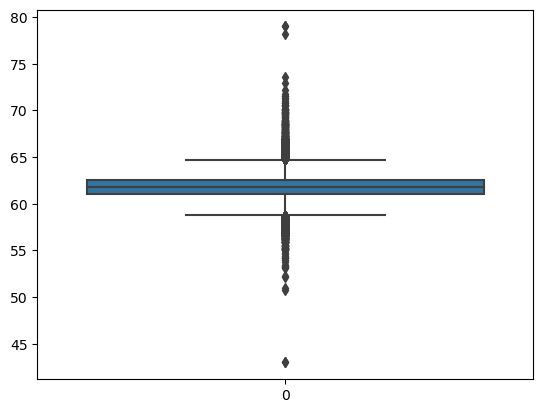

In [78]:
sns.boxplot(data["depth"])

<Axes: >

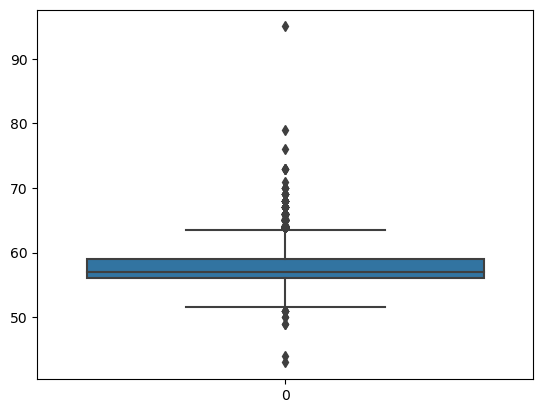

In [79]:
sns.boxplot(data["table"])

<Axes: >

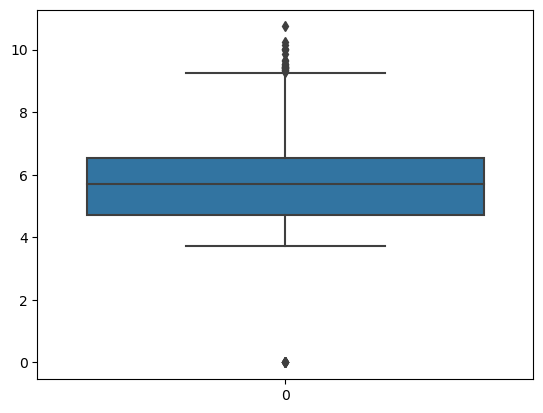

In [80]:
sns.boxplot(data["x"])

<Axes: >

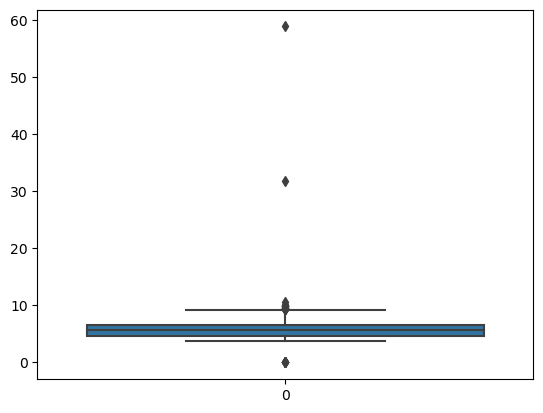

In [81]:
sns.boxplot(data["y"])

<Axes: >

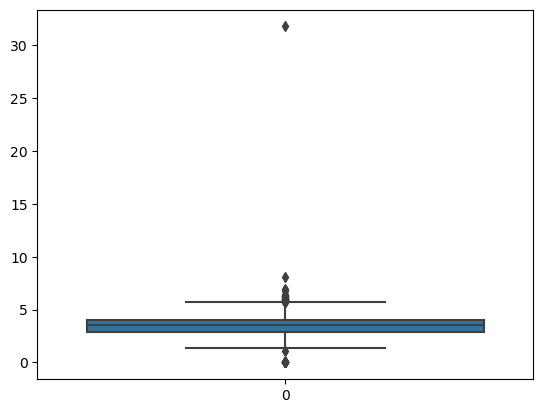

In [82]:
sns.boxplot(data["z"])

<Axes: xlabel='carat', ylabel='Density'>

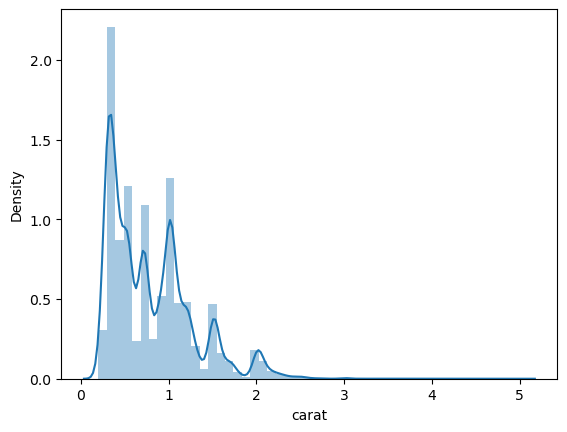

In [83]:
sns.distplot(data["carat"])

In [84]:
IQR=data.carat.quantile(0.75)-data.carat.quantile(0.25)
IQR

0.64

In [85]:
lb=data["carat"].quantile(0.25)-IQR*3
ub=data["carat"].quantile(0.75)+IQR*3
lb,ub

(-1.52, 2.96)

In [86]:
data.loc[data["carat"]>2.96,"carat"]=2.96

<Axes: xlabel='depth', ylabel='Density'>

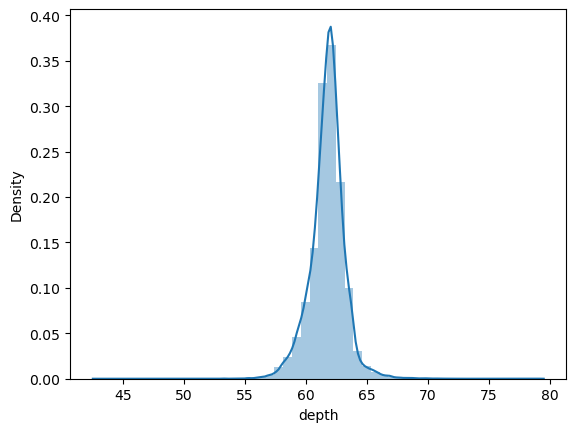

In [87]:
sns.distplot(data["depth"])

In [88]:
up1=data["depth"].mean()+3*data["depth"].std()
lb1=data["depth"].mean()-3*data["depth"].std()
print(up1,lb1)

66.0462685959459 57.45974340405411


In [89]:
data.loc[data["depth"]<57.45974340405411,"depth"]=57.45974340405411
data.loc[data["depth"]>66.0462685959459,"depth"]=66.0462685959459

<Axes: xlabel='table', ylabel='Density'>

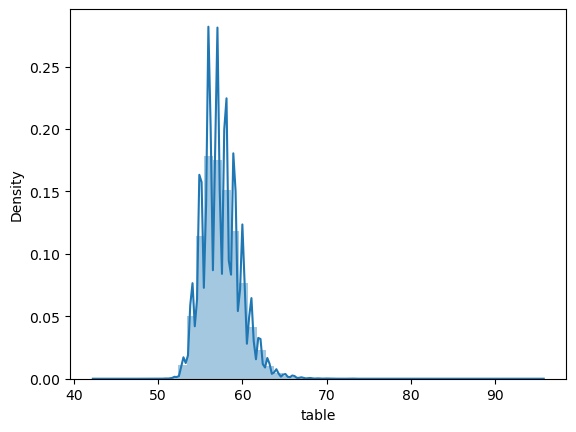

In [90]:
sns.distplot(data["table"])

In [91]:
IQR2=data.table.quantile(0.75)-data.table.quantile(0.25)
IQR2

3.0

In [92]:
lb2=data["table"].quantile(0.25)-IQR2*3
ub2=data["table"].quantile(0.75)+IQR2*3
lb2,ub2

(47.0, 68.0)

In [93]:
data.loc[data["table"]>10.04,"table"]=10.04
data.loc[data["table"]<-8.6,"table"]=-8.6

<Axes: xlabel='x', ylabel='Density'>

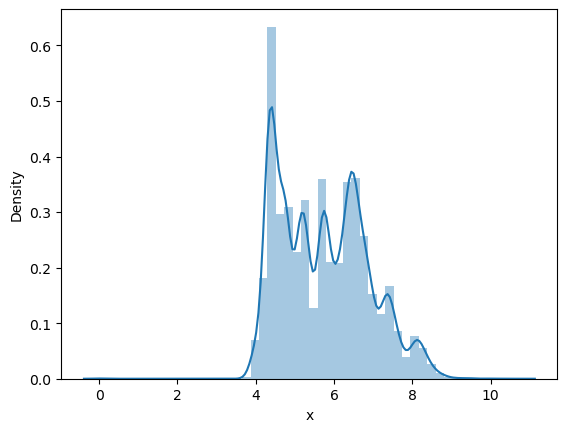

In [94]:
sns.distplot(data["x"])

In [95]:
IQR3=data.x.quantile(0.75)-data.x.quantile(0.25)
IQR3

1.83

In [96]:
lb3=data["x"].quantile(0.25)-IQR3*3
ub3=data["x"].quantile(0.75)+IQR3*3
lb3,ub3

(-0.7800000000000002, 12.030000000000001)

In [97]:
data.loc[data["x"]>12.030000000000001,"x"]=12.030000000000001
data.loc[data["x"]<-0.7800000000000002,"x"]=-0.7800000000000002

<Axes: xlabel='y', ylabel='Density'>

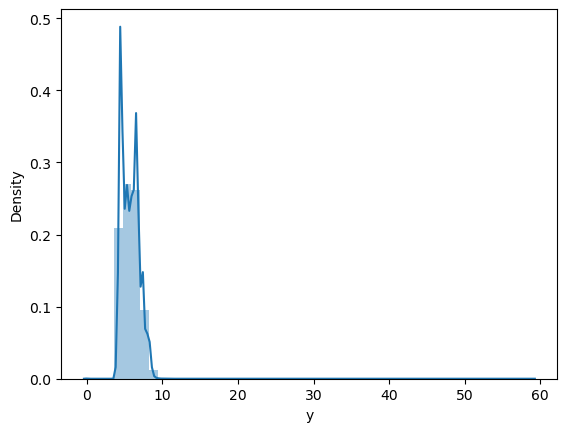

In [98]:
sns.distplot(data["y"])

In [99]:
IQR4=data.y.quantile(0.75)-data.y.quantile(0.25)
IQR4

1.8200000000000003

In [100]:
lb4=data["y"].quantile(0.25)-IQR4*3
ub4=data["y"].quantile(0.75)+IQR4*3
lb4,ub4

(-0.7400000000000011, 12.0)

In [101]:
data.loc[data["y"]>12.0,"y"]=12.0

<Axes: xlabel='z', ylabel='Density'>

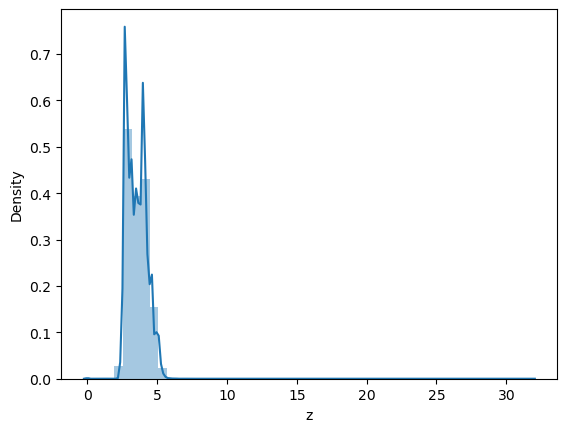

In [102]:
sns.distplot(data["z"])

In [103]:
IQR5=data.z.quantile(0.75)-data.z.quantile(0.25)
IQR5

1.13

In [104]:
lb5=data["z"].quantile(0.25)-IQR5*3
ub5=data["z"].quantile(0.75)+IQR5*3
lb5,ub5

(-0.47999999999999954, 7.43)

In [105]:
data.loc[data["z"]>7.43,"z"]=7.43
data.loc[data["z"]<-0.47999999999999954,"z"]=-0.47999999999999954

In [106]:
data.skew()

carat      1.077004
cut       -0.189237
color      0.187885
clarity    0.174268
depth     -0.207682
table      0.000000
x          0.379076
y          0.381086
z          0.353015
price      1.052633
dtype: float64

In [107]:
data.shape

(50000, 10)

In [108]:
d1=data[data.carat>0]
d1.shape

(50000, 10)

In [109]:
data["carat"]=np.log(data["carat"])

In [110]:
data.skew()

carat      0.092108
cut       -0.189237
color      0.187885
clarity    0.174268
depth     -0.207682
table      0.000000
x          0.379076
y          0.381086
z          0.353015
price      1.052633
dtype: float64

# Model Building

In [111]:
data.head(2)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,-1.469676,2,1,3,61.5,10.04,3.95,3.98,2.43,0
1,-1.560648,3,1,2,59.8,10.04,3.89,3.84,2.31,0


In [112]:
c=data.corr()

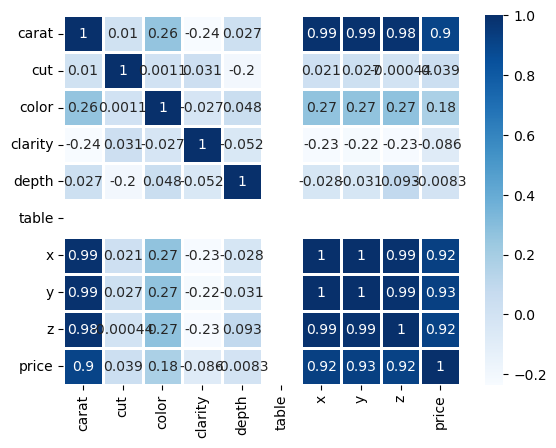

In [113]:
heatmap=sns.heatmap(c,linewidth=1 ,annot=True ,cmap=plt.cm. Blues)

In [114]:
x1=data.iloc[:,:-1]
y1=data.iloc[:,-1]

In [115]:
x1.head(2)

,carat,cut,color,clarity,depth,table,x,y,z
0,-1.469676,2,1,3,61.5,10.04,3.95,3.98,2.43
1,-1.560648,3,1,2,59.8,10.04,3.89,3.84,2.31


In [116]:
y1.head(2)

0    0
1    0
Name: price, dtype: int64

In [117]:
px1_train,px1_test,py1_train,py1_test=train_test_split(x1,y1,test_size=0.2,random_state=101)

In [118]:
px1_train.shape,px1_test.shape,py1_train.shape,py1_test.shape

((40000, 9), (10000, 9), (40000,), (10000,))

In [119]:
lin.fit(px1_train,py1_train)

LinearRegression()

In [120]:
p6=lin.predict(px1_test)
p6

array([6172.52231351, 4840.14993319, 3102.20851864, ..., 2075.22239816,
       7201.00339488, 1602.55919072])

In [121]:
l_r2=lin.score(px1_train,py1_train)
l_r2

0.8872467359077948

In [122]:
l_adj_r2=1-(((1-R2)*(40000-1))/(40000-9-1))
l_adj_r2

0.9106513964384823

In [123]:
l_mse=metrics.mean_squared_error(py1_test,p6)
l_mse

862070.1085300497

In [124]:
l_rmse=pow(l_mse,0.5)
l_rmse

928.4773064162903

In [125]:
df6=pd.DataFrame({"Actual":py1_test,"Predicted":p6})
df6

,Actual,Predicted
18447,7071,6172.522314
17768,6731,4840.149933
45879,1675,3102.208519
16972,6390,4949.012314
12165,4778,5653.055166
...,...,...
40899,1116,1748.039539
7806,3833,4617.962982
41481,1178,2075.222398
21802,8742,7201.003395


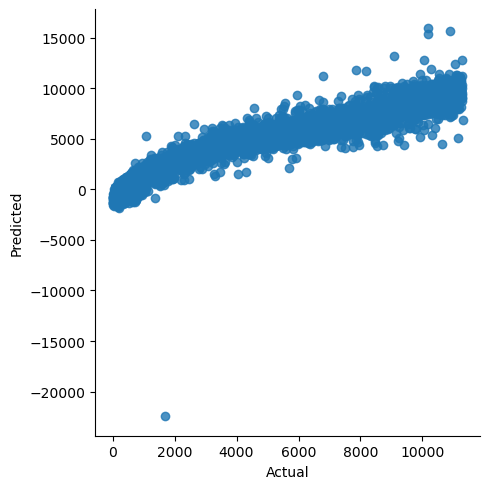

In [126]:
sns.lmplot(data=df6,x="Actual",y="Predicted")

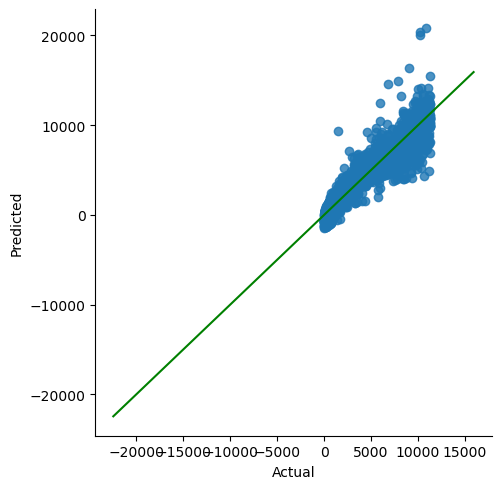

In [127]:
sns.lmplot(x="Actual",y="Predicted",data=df1,fit_reg=False)
d_line=np.arange(df6.min().min(),df6.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")

# Lasso

In [128]:
lasso.fit(px1_train,py1_train)

Lasso()

In [129]:
p7=lasso.predict(px1_test)
p7

array([6173.18125567, 4847.18327765, 3107.08197194, ..., 2078.87005291,
       7182.19986083, 1623.6950012 ])

In [130]:
df7=pd.DataFrame({"Importances":list(lasso.coef_),"Columns":list(x1)})
df7

,Importances,Columns
0,-3343.749645,carat
1,50.975469,cut
2,-159.987730,color
3,218.592072,clarity
4,155.822189,depth
5,-0.000000,table
6,1848.947563,x
7,2469.619020,y
8,0.000000,z


In [131]:
la_r2=lasso.score(px1_train,py1_train)
la_r2

0.8871994804040971

In [132]:
adjlar2=1-(((1-la_r2)*(40000-1))/(40000-9-1))
adjlar2

0.8871740939405721

In [133]:
result=pd.DataFrame({"actual":py1_test,"predicted":p7})
result

,actual,predicted
18447,7071,6173.181256
17768,6731,4847.183278
45879,1675,3107.081972
16972,6390,4959.808148
12165,4778,5659.898570
...,...,...
40899,1116,1754.785618
7806,3833,4624.844570
41481,1178,2078.870053
21802,8742,7182.199861


In [134]:
mse_la=metrics.mean_squared_error(py1_test,p7)
mse_la

867780.9087342812

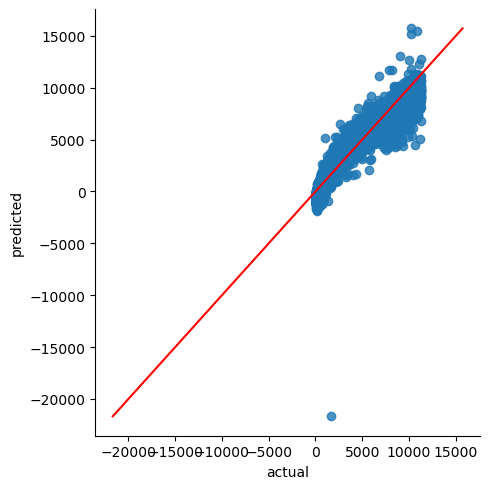

In [135]:
sns.lmplot(x="actual",y="predicted",data=result,fit_reg=False)
d_line=np.arange(result.min().min(),result.max().max())
plt.plot(d_line,d_line,color="red",linestyle="-")

# Ridge


In [136]:
rd.fit(px1_train,py1_train)

Ridge()

In [137]:
p8=rd.predict(px1_test)

In [138]:
list(rd.coef_)

[-3575.5310133940484,
 51.51565720883552,
 -161.362080255235,
 218.29134931357765,
 156.88168683740236,
 -2.8029537640989716e-22,
 1835.776441831489,
 2550.849275728955,
 87.1540010695715]

In [139]:
d_1=pd.DataFrame({"Coeff":list(rd.coef_),"columns":list(x1)})
d_1

,Coeff,columns
0,-3.575531e+03,carat
1,5.151566e+01,cut
2,-1.613621e+02,color
3,2.182913e+02,clarity
4,1.568817e+02,depth
5,-2.802954e-22,table
6,1.835776e+03,x
7,2.550849e+03,y
8,8.715400e+01,z


In [140]:
rd_r2=rd.score(px1_train,py1_train)
rd_r2

0.8872464294950771

In [141]:
rdadj_r2=1-(((1-rd_r2)*(40000-1))/(40000-9-1))
rdadj_r2

0.8872210535977392

In [142]:
mse_rd=metrics.mean_squared_error(py1_test,p8)
mse_rd

862508.1887909977

In [143]:
l5=["Linear","Lasso","Ridge"]
l6=[l_r2,la_r2,rd_r2]
l7=[l_adj_r2,adjlar2,rdadj_r2]
l8=[l_mse,mse_la,mse_rd]

In [144]:
final=pd.DataFrame({"Modelname":l5,"R-square":l6,"Adj-R2":l7,"MSE":l8})
final

,Modelname,R-square,Adj-R2,MSE
0,Linear,0.887247,0.910651,862070.108530
1,Lasso,0.887199,0.887174,867780.908734
2,Ridge,0.887246,0.887221,862508.188791


# XGB Regressor

In [145]:
xgbr.fit(px1_train,py1_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [146]:
px1_train.shape

(40000, 9)

In [147]:
p9=xgbr.predict(px1_test)

In [148]:
xgb_r_2=xgbr.score(px1_train,py1_train)
xgb_r_2

0.9927847472066178

In [149]:
xgb_adjr_2=1-(((1-xgb_r_2)*( 40000-1))/(40000-9-1))
xgb_adjr_2

0.9927831233687798

In [150]:
xgb_MSE1=metrics.mean_squared_error(py1_test,p9)
xgb_MSE1

101790.94220481071

# Random Forest Regressor

In [151]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(px1_train,py1_train)

RandomForestRegressor()

In [152]:
p10=rf.predict(px1_test)

In [153]:
rf_r_2=rf.score(px1_train,py1_train)
rf_r_2

0.99835443057119

In [154]:
rf_adjr_2=1-(((1-rf_r_2)*(40000-1))/( 40000-9-1))
rf_adjr_2

0.9983540602254821

In [155]:
rf_MSE=metrics.mean_squared_error(py1_test,p10)
rf_MSE

107050.16718938675

In [156]:
l5=["Linear","Lasso","Ridge","XGB","Random Forest"]
l6=[l_r2,la_r2,rd_r2,xgb_r_2,rf_r_2]
l7=[l_adj_r2,adjlar2,rdadj_r2,xgb_adjr_2,rf_adjr_2]
l8=[l_mse,mse_la,mse_rd,xgb_MSE1,rf_MSE]

In [157]:
final=pd.DataFrame({"Modelname":l5,"R-square":l6,"Adj-R2":l7,"MSE":l8})
final

,Modelname,R-square,Adj-R2,MSE
0,Linear,0.887247,0.910651,862070.108530
1,Lasso,0.887199,0.887174,867780.908734
2,Ridge,0.887246,0.887221,862508.188791
3,XGB,0.992785,0.992783,101790.942205
4,Random Forest,0.998354,0.998354,107050.167189


In [202]:
df7=pd.DataFrame({"Importances":list(lasso.coef_),"Columns":list(x1)})
df7

,Importances,Columns
0,-3691.422786,carat
1,49.299124,cut
2,-160.825106,color
3,217.772458,clarity
4,163.546341,depth
5,-0.000000,table
6,1886.216897,x
7,2601.150110,y
8,25.361932,z


In [203]:
x1.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,-1.469676,2,1,3,61.500000,10.04,3.95,3.98,2.43
1,-1.560648,3,1,2,59.800000,10.04,3.89,3.84,2.31
2,-1.469676,1,1,4,57.459743,10.04,4.05,4.07,2.31
3,-1.237874,3,5,5,62.400000,10.04,4.20,4.23,2.63
4,-1.171183,1,6,3,63.300000,10.04,4.34,4.35,2.75


In [204]:
x1_new=x1.drop(["table","z"],axis=1)


In [205]:
x1_new.head()

,carat,cut,color,clarity,depth,x,y
0,-1.469676,2,1,3,61.500000,3.95,3.98
1,-1.560648,3,1,2,59.800000,3.89,3.84
2,-1.469676,1,1,4,57.459743,4.05,4.07
3,-1.237874,3,5,5,62.400000,4.20,4.23
4,-1.171183,1,6,3,63.300000,4.34,4.35


In [207]:
px1_tr,px1_te,py1_tr,py1_te=train_test_split(x1_new,y1,test_size=0.2,random_state=101)

In [208]:
px1_tr.shape,px1_te.shape,py1_tr.shape,py1_te.shape

((40000, 7), (10000, 7), (40000,), (10000,))

# Linear

In [209]:
x1=data.iloc[:,:-1]
y1=data.iloc[:,-1]

In [210]:
x1.head(2)

,carat,cut,color,clarity,depth,table,x,y,z
0,-1.469676,2,1,3,61.5,10.04,3.95,3.98,2.43
1,-1.560648,3,1,2,59.8,10.04,3.89,3.84,2.31


In [211]:
y1.head(2)

0    0
1    0
Name: price, dtype: int64

In [216]:
px1_tr,px1_tet,py1_tr,py1_te=train_test_split(x1_new,y1,test_size=0.2,random_state=101)

In [217]:
px1_tr.shape,px1_te.shape,py1_tr.shape,py1_te.shape

((40000, 7), (10000, 7), (40000,), (10000,))

In [218]:
lin.fit(px1_tr,py1_tr)

LinearRegression()

In [219]:
p6=lin.predict(px1_te)
p6

array([6172.30956132, 4839.70194402, 3102.39355817, ..., 2076.32920947,
       7200.41640865, 1603.62522222])

In [220]:
l_r2=lin.score(px1_tr,py1_tr)
l_r2

0.8872423513952183

In [221]:
l_adj_r2=1-(((1-R2)*(40000-1))/(40000-7-1))
l_adj_r2

0.9106558647623251

In [222]:
l_mse=metrics.mean_squared_error(py1_te,p6)
l_mse

862157.8699057664

In [223]:
l_rmse=pow(l_mse,0.5)
l_rmse

928.524566129387

In [225]:
df6=pd.DataFrame({"Actual":py1_te,"Predicted":p6})
df6

,Actual,Predicted
18447,7071,6172.309561
17768,6731,4839.701944
45879,1675,3102.393558
16972,6390,4949.236063
12165,4778,5652.906576
...,...,...
40899,1116,1748.993928
7806,3833,4617.897936
41481,1178,2076.329209
21802,8742,7200.416409


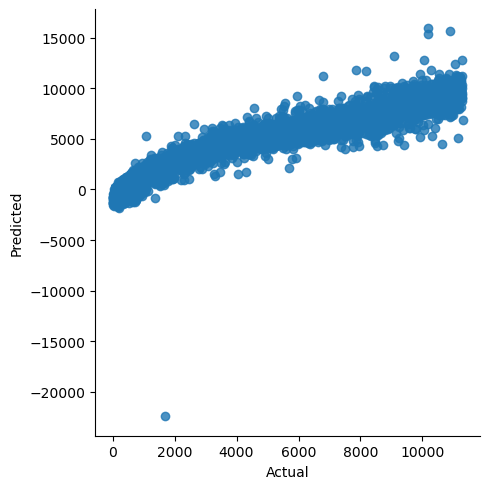

In [226]:
sns.lmplot(data=df6,x="Actual",y="Predicted")

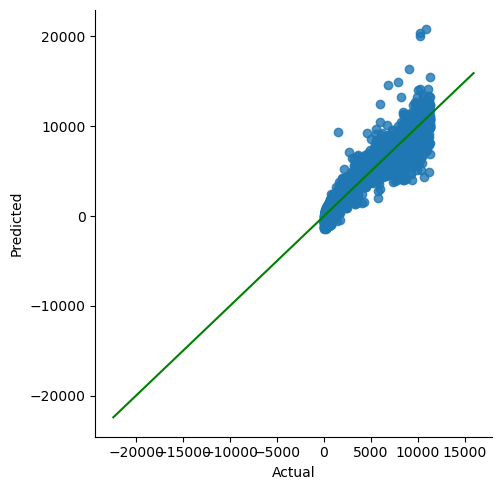

In [227]:
sns.lmplot(x="Actual",y="Predicted",data=df1,fit_reg=False)
d_line=np.arange(df6.min().min(),df6.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")

# Lasso

In [228]:
lasso.fit(px1_tr,py1_tr)

Lasso()

In [229]:
p7=lasso.predict(px1_te)
p7

array([6173.18579484, 4847.17597375, 3107.07629533, ..., 2078.86636732,
       7182.17861078, 1623.70235976])

In [232]:
la_r2=lasso.score(px1_tr,py1_tr)
la_r2

0.8871994741957187

In [233]:
adjlar2=1-(((1-la_r2)*(40000-1))/(40000-7-1))
adjlar2

0.8871797301548947

In [234]:
result=pd.DataFrame({"actual":py1_te,"predicted":p7})
result

,actual,predicted
18447,7071,6173.185795
17768,6731,4847.175974
45879,1675,3107.076295
16972,6390,4959.820646
12165,4778,5659.900261
...,...,...
40899,1116,1754.781193
7806,3833,4624.841404
41481,1178,2078.866367
21802,8742,7182.178611


In [235]:
mse_la=metrics.mean_squared_error(py1_te,p7)
mse_la

867781.3877225039

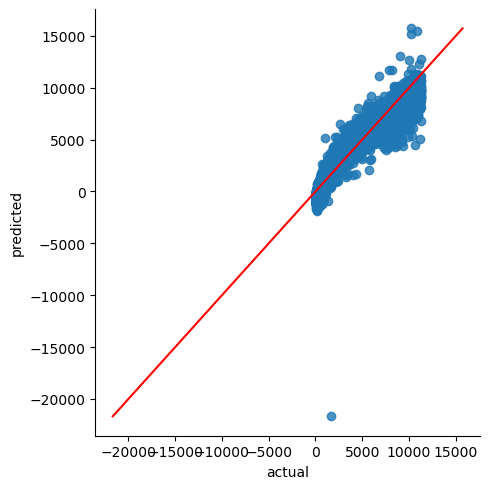

In [236]:
sns.lmplot(x="actual",y="predicted",data=result,fit_reg=False)
d_line=np.arange(result.min().min(),result.max().max())
plt.plot(d_line,d_line,color="red",linestyle="-")

# Ridge

In [237]:
rd.fit(px1_tr,py1_tr)

Ridge()

In [238]:
p8=rd.predict(px1_te)

In [239]:
list(rd.coef_)

[-3573.3187502185024,
 51.55691645392225,
 -161.3572943161488,
 218.3044296815298,
 162.2448910842441,
 1864.33282463255,
 2574.804080154618]

In [241]:
rd_r2=rd.score(px1_tr,py1_tr)
rd_r2

0.8872420600511554

In [242]:
rdadj_r2=1-(((1-rd_r2)*(40000-1))/(40000-7-1))
rdadj_r2

0.8872223234643469

In [243]:
mse_rd=metrics.mean_squared_error(py1_te,p8)
mse_rd

862599.2458453259

In [244]:
l5=["Linear","Lasso","Ridge"]
l6=[l_r2,la_r2,rd_r2]
l7=[l_adj_r2,adjlar2,rdadj_r2]
l8=[l_mse,mse_la,mse_rd]

In [245]:
final=pd.DataFrame({"Modelname":l5,"R-square":l6,"Adj-R2":l7,"MSE":l8})
final

,Modelname,R-square,Adj-R2,MSE
0,Linear,0.887242,0.910656,862157.869906
1,Lasso,0.887199,0.887180,867781.387723
2,Ridge,0.887242,0.887222,862599.245845


# XG Boost Regressor

In [246]:
xgbr.fit(px1_tr,py1_tr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [247]:
px1_tr.shape

(40000, 7)

In [248]:
p9=xgbr.predict(px1_te)

In [249]:
xgb_r_2=xgbr.score(px1_tr,py1_tr)
xgb_r_2

0.9926063652060195

In [250]:
xgb_adjr_2=1-(((1-xgb_r_2)*( 40000-1))/(40000-7-1))
xgb_adjr_2


0.9926050710611016

In [251]:
xgb_MSE1=metrics.mean_squared_error(py1_te,p9)
xgb_MSE1

103282.64813365658

# Random Forest Regressor

In [252]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(px1_tr,py1_tr)

RandomForestRegressor()

In [253]:
p10=rf.predict(px1_te)

In [254]:
rf_r_2=rf.score(px1_tr,py1_tr)
rf_r_2

0.9983287418116924

In [255]:
rf_adjr_2=1-(((1-rf_r_2)*(40000-1))/( 40000-7-1))
rf_adjr_2

0.9983284492830037

In [256]:
rf_MSE=metrics.mean_squared_error(py1_te,p10)
rf_MSE

108638.83887482817

In [257]:
l5=["Linear","Lasso","Ridge","XGB","Random Forest"]
l6=[l_r2,la_r2,rd_r2,xgb_r_2,rf_r_2]
l7=[l_adj_r2,adjlar2,rdadj_r2,xgb_adjr_2,rf_adjr_2]
l8=[l_mse,mse_la,mse_rd,xgb_MSE1,rf_MSE]

In [258]:
final=pd.DataFrame({"Modelname":l5,"R-square":l6,"Adj-R2":l7,"MSE":l8})
final

,Modelname,R-square,Adj-R2,MSE
0,Linear,0.887242,0.910656,862157.869906
1,Lasso,0.887199,0.887180,867781.387723
2,Ridge,0.887242,0.887222,862599.245845
3,XGB,0.992606,0.992605,103282.648134
4,Random Forest,0.998329,0.998328,108638.838875
